In [93]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Task 1

## Reading the image

In [94]:
img = cv2.imread("/content/Dog.jpeg.jpg")

## Display the image

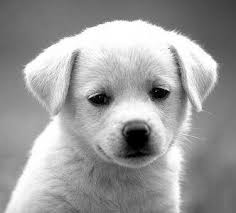

In [95]:
cv2_imshow(img)

## Extracting the size

In [96]:
img_shape = img.shape

img_shape

(213, 236, 3)

## Converting to gray scale

shape after conversion: (213, 236)


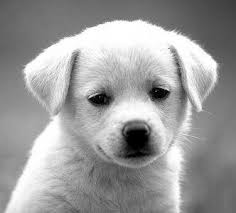

In [97]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


print(f"shape after conversion: {gray_image.shape}")


cv2_imshow(gray_image)

## Applying binary threshold and counting total black pixels

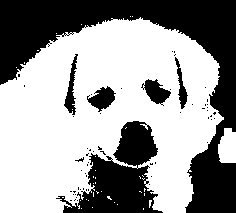

total black pixels: 19802
Shape of binary img: (213, 236)


In [98]:
threshold = 127
_, binary_img = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

cv2_imshow(binary_img)

black_pixel_count = np.sum(binary_img == 0)

print(f"total black pixels: {black_pixel_count}")

print(f"Shape of binary img: {binary_img.shape}")

# Task 2

## Performing Edge Detection

### Sobel Operator


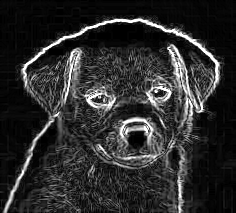

In [99]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

cv2_imshow(sobel)

### Prewitt Operator

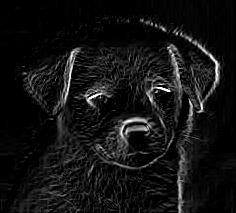

In [100]:
prewitt_x = cv2.filter2D(img, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(img, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))

cv2_imshow(prewitt)


### Roberts Cross Operator

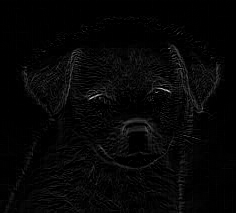

In [101]:
roberts_x = cv2.filter2D(img, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(img, -1, np.array([[0, 1], [-1, 0]]))
roberts = cv2.magnitude(roberts_x.astype(float), roberts_y.astype(float))

cv2_imshow(roberts)

### Canny Edge Detector

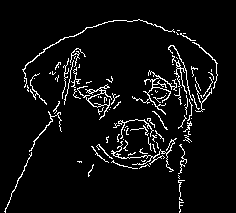

In [102]:
edges = cv2.Canny(img, 100, 200)

cv2_imshow(edges)

## Image Segmentation

### Global Thresholding


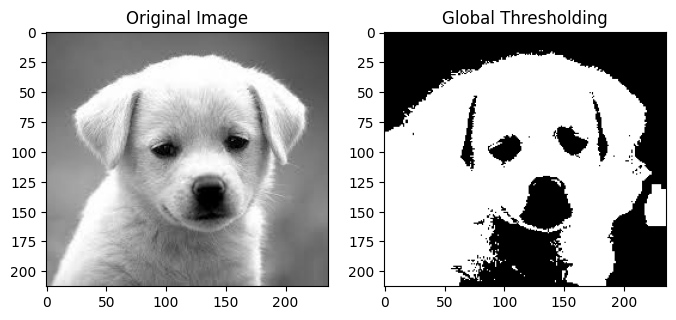

In [103]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(binary_img, cmap='gray'), plt.title("Global Thresholding")
plt.show()

### Adaptive Thresholding

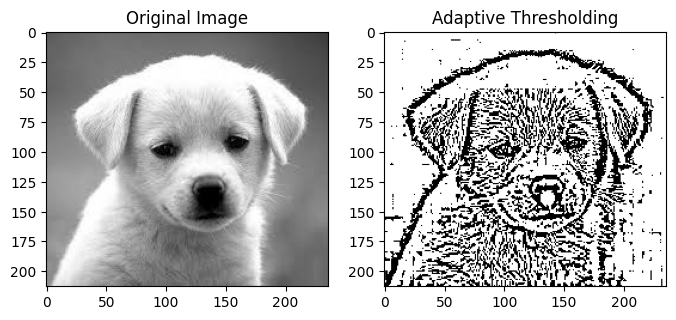

In [104]:
adaptive_threshold_img = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(gray_image, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(adaptive_threshold_img, cmap='gray'), plt.title("Adaptive Thresholding")
plt.show()


### Canny Detection

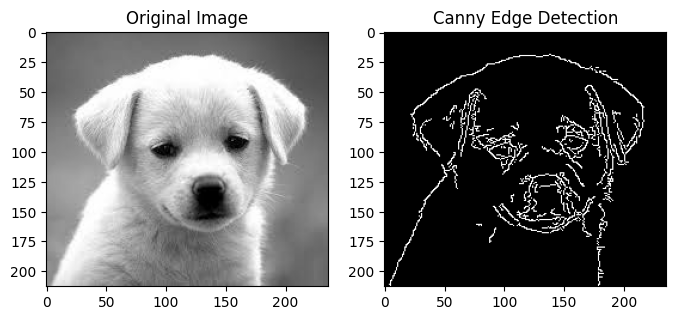

In [105]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(edges, cmap='gray'), plt.title("Canny Edge Detection")
plt.show()

### Watershed Detection

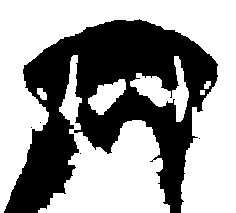

In [111]:
_, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
noised_removed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

cv2_imshow(noised_removed)

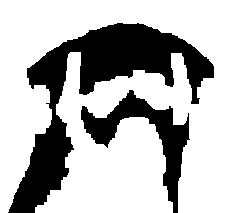

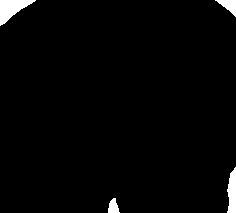

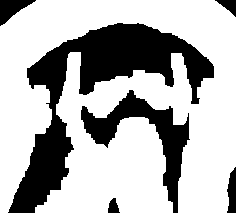

In [112]:
sure_bg = cv2.dilate(noised_removed, kernel, iterations=3)

dist_transform = cv2.distanceTransform(noised_removed, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

cv2_imshow(sure_bg)
cv2_imshow(sure_fg)
cv2_imshow(unknown)

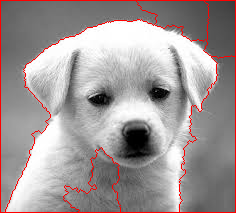

In [113]:
_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0

cv2.watershed(img, markers)
img[markers == -1] = [0, 0, 255]

cv2_imshow(img)